As a culminating project, you'll be working with a dataset from ABC company, consisting of 458 rows and 9 columns. The company requires a comprehensive report detailing information about their employees across various teams. Your tasks include preprocessing the dataset, analyzing the data, and presenting your findings graphically.


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('ABC Company.xlsx')
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,2025-02-06,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,2025-06-06,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,2025-05-06,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,2025-05-06,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,2025-10-06,231,NaN,5000000.0


Correct the data in the "height" column by replacing it with random numbers between 150 and 180. Ensure data consistency and integrity before proceeding with analysis.

In [4]:
df['Height'] = np.random.randint(150, 180, size=len(df))
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,179,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,154,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,175,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,162,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,173,231,NaN,5000000.0


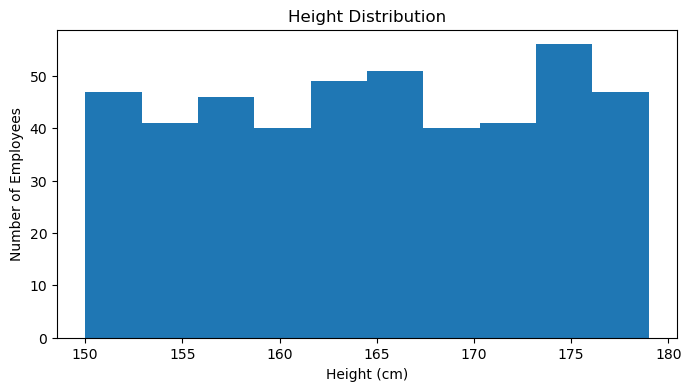

In [5]:
plt.figure(figsize=(8,4))
plt.hist(df['Height'])   
plt.title('Height Distribution')
plt.xlabel('Height (cm)')
plt.ylabel('Number of Employees')
plt.show()           
           
           

The above height distribution ensures data consistence for height values

Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees

In [6]:
team_distribution = df['Team'].value_counts()
team_distribution

Team
New Orleans Pelicans      19
Memphis Grizzlies         18
Utah Jazz                 16
Milwaukee Bucks           16
New York Knicks           16
Boston Celtics            15
Los Angeles Clippers      15
Los Angeles Lakers        15
Phoenix Suns              15
Sacramento Kings          15
Brooklyn Nets             15
Philadelphia 76ers        15
Toronto Raptors           15
Golden State Warriors     15
Indiana Pacers            15
Detroit Pistons           15
Cleveland Cavaliers       15
Chicago Bulls             15
Houston Rockets           15
San Antonio Spurs         15
Atlanta Hawks             15
Dallas Mavericks          15
Charlotte Hornets         15
Miami Heat                15
Denver Nuggets            15
Washington Wizards        15
Portland Trail Blazers    15
Oklahoma City Thunder     15
Orlando Magic             14
Minnesota Timberwolves    14
Name: count, dtype: int64

In [7]:
percentage_split= df['Team'].value_counts(normalize=True) * 100
percentage_split



Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz                 3.493450
Milwaukee Bucks           3.493450
New York Knicks           3.493450
Boston Celtics            3.275109
Los Angeles Clippers      3.275109
Los Angeles Lakers        3.275109
Phoenix Suns              3.275109
Sacramento Kings          3.275109
Brooklyn Nets             3.275109
Philadelphia 76ers        3.275109
Toronto Raptors           3.275109
Golden State Warriors     3.275109
Indiana Pacers            3.275109
Detroit Pistons           3.275109
Cleveland Cavaliers       3.275109
Chicago Bulls             3.275109
Houston Rockets           3.275109
San Antonio Spurs         3.275109
Atlanta Hawks             3.275109
Dallas Mavericks          3.275109
Charlotte Hornets         3.275109
Miami Heat                3.275109
Denver Nuggets            3.275109
Washington Wizards        3.275109
Portland Trail Blazers    3.275109
Oklahoma City Thunder     3.275109
Orlando Magic  

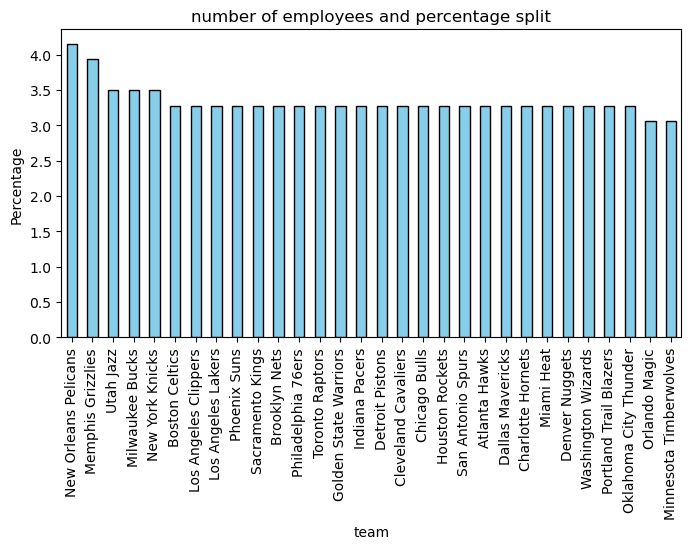

In [8]:
plt.figure(figsize=(8,4))
percentage_split.plot(kind='bar', color='skyblue', edgecolor='black') 
plt.title('number of employees and percentage split')
plt.ylabel('Percentage')
plt.xlabel('team')
plt.show()    

Here New Orleans Pelicans hav the highest percentage,this team has most number of employees

● Segregate employees based on their positions within the company.

In [9]:
unique_position =df['Position'].unique()
unique_position

array(['PG', 'SF', 'SG', 'PF', 'C'], dtype=object)

In [10]:
segregation = df.groupby('Position')
for position, group in segregation:
    print(f"\nPosition: {position}")
    print(group[['Name', 'Team','Number','Position', 'Age', 'Height','Weight','College', 'Salary']])



Position: C
                Name                    Team  Number Position  Age  Height  \
7       Kelly Olynyk          Boston Celtics      41        C   25     155   
10   Jared Sullinger          Boston Celtics       7        C   24     156   
14      Tyler Zeller          Boston Celtics      44        C   26     179   
23       Brook Lopez           Brooklyn Nets      11        C   28     151   
27        Henry Sims           Brooklyn Nets      14        C   26     166   
..               ...                     ...     ...      ...  ...     ...   
439    Mason Plumlee  Portland Trail Blazers      24        C   26     165   
447      Rudy Gobert               Utah Jazz      27        C   23     158   
455     Tibor Pleiss               Utah Jazz      21        C   26     158   
456      Jeff Withey               Utah Jazz      24        C   26     178   
457         Priyanka               Utah Jazz      34        C   25     176   

     Weight         College      Salary  
7       

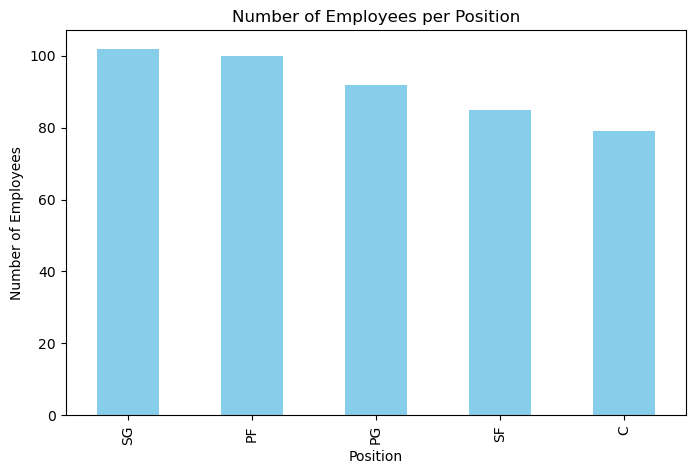

In [11]:
position_counts = df['Position'].value_counts()
position_counts.plot(kind='bar', color='skyblue', figsize=(8,5))
plt.title('Number of Employees per Position')
plt.xlabel('Position')
plt.ylabel('Number of Employees')
plt.show()



There are total noumber of 5 positions.
SG position has most employees whereas C has the least employees

Identify the predominant age group among employees. 

In [14]:
age_set=[0,13,20,35,55,100]
age_Category=['<13:children','13-20:teenagers','20-35:young adults','35-55:middle aged adults','55+:seniors']
df['AgeGroup']=pd.cut(df['Age'],bins=age_set,  labels=age_Category)
print("predominent age group:",df['AgeGroup'].mode()[0])
Category=df['AgeGroup'].value_counts()
print("age count:\n\n",Category)


predominent age group: 20-35:young adults
age count:

 AgeGroup
20-35:young adults          414
35-55:middle aged adults     23
13-20:teenagers              21
<13:children                  0
55+:seniors                   0
Name: count, dtype: int64


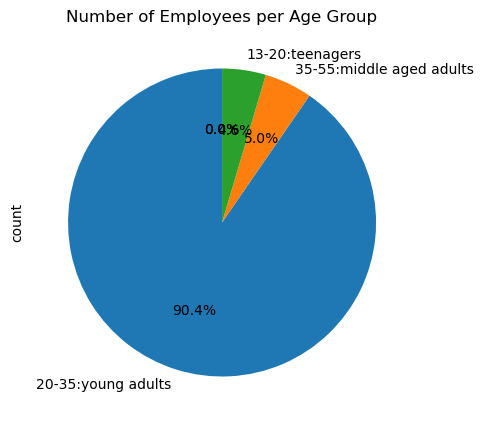

In [15]:
Category.plot(kind='pie',autopct='%1.1f%%',startangle=90,figsize=(8,5))
plt.title('Number of Employees per Age Group')
plt.show()

from the piechart, most of the employees age is in between 20-35 whome are young adults.Children or Seniors are not there as an employee in any Team

*Discover which team and position have the highest salary expenditure.


In [16]:
Salary_level = df.groupby(['Team', 'Position'])['Salary'].sum()
highest_salary=Salary_level.idxmax()
value=Salary_level.max()
print("Team and Position:",highest_salary)
print("Highest salary expenditure:",value)

Team and Position: ('Los Angeles Lakers', 'SF')
Highest salary expenditure: 31866445.0


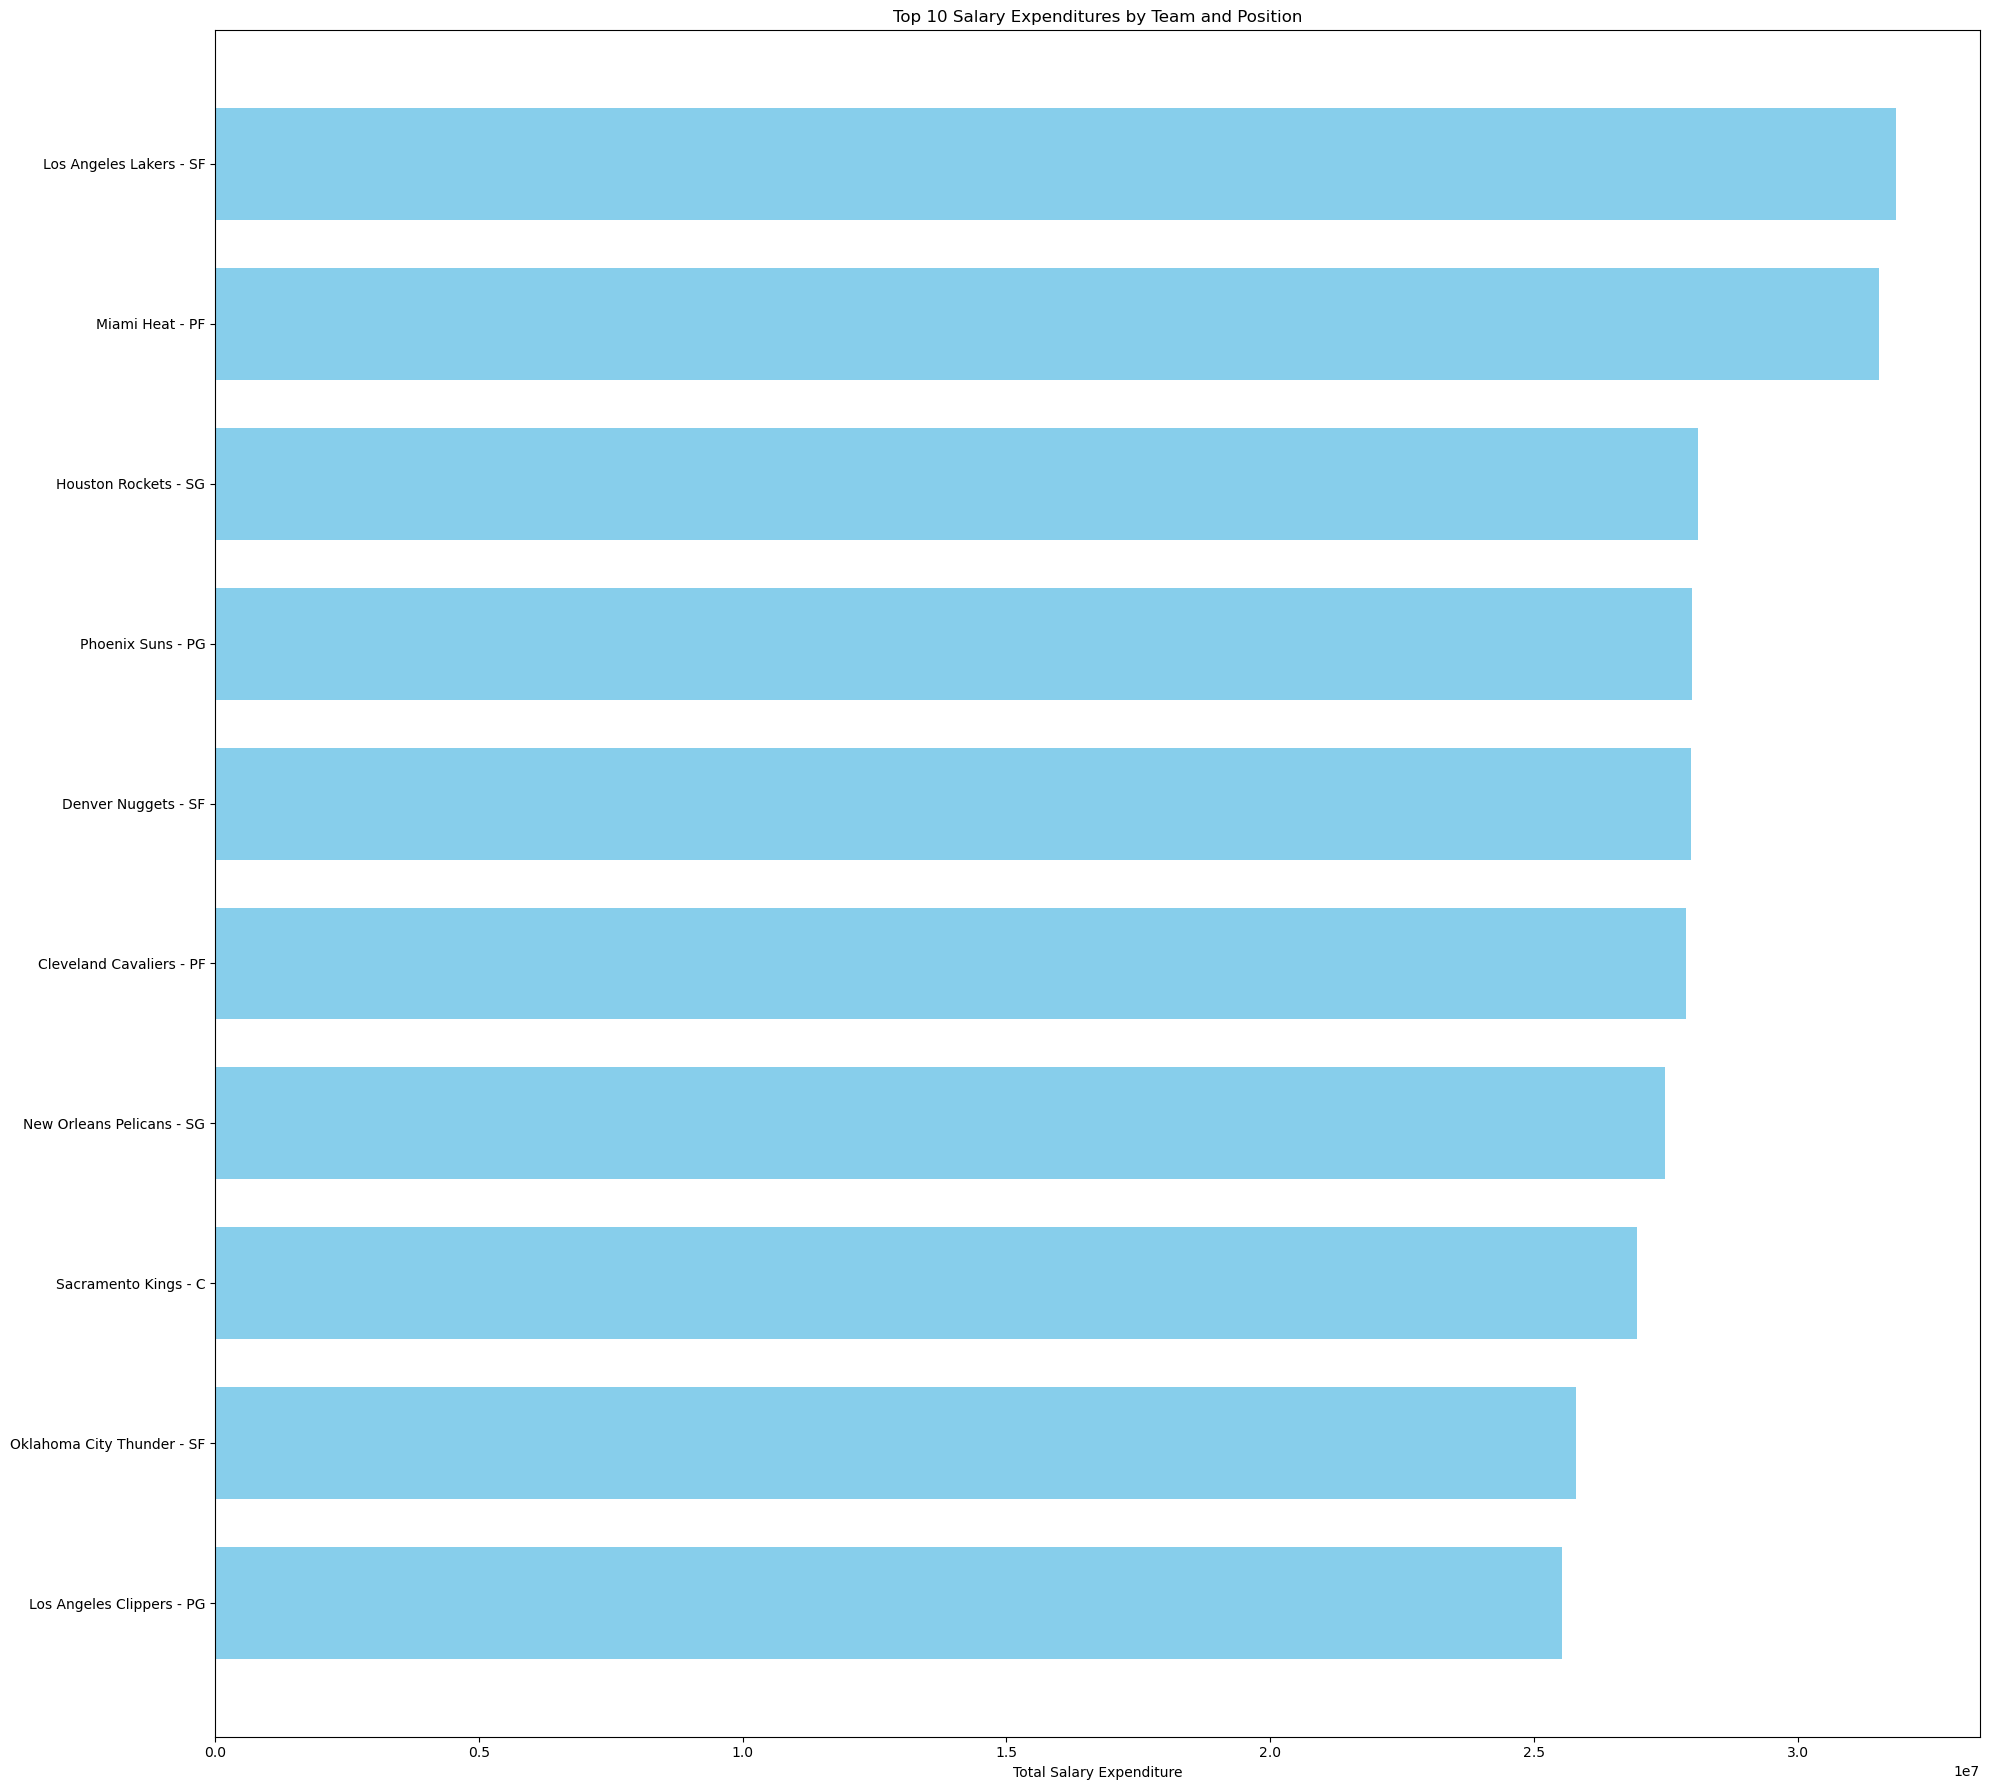

In [38]:
top_n = 10
top_salaries = Salary_level.sort_values(ascending=False).head(top_n)
labels = [f"{team} - {pos}" for team, pos in top_salaries.index]

plt.figure(figsize=(20,18))
plt.barh(labels, top_salaries.values, color='skyblue', height=0.7)
plt.xlabel("Total Salary Expenditure")
plt.title(f"Top {top_n} Salary Expenditures by Team and Position")
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()


Team Los Angeles lakers of position SF has the highest salary .it provides only the top 10 highest salary team - position.

investigate if there's any correlation between age and salary, and represent it visually.

In [11]:
correlation = df[['Age', 'Salary']].corr().loc['Age', 'Salary']
print(f"Correlation between Age and Salary: {correlation:.2f}")


Correlation between Age and Salary: 0.21


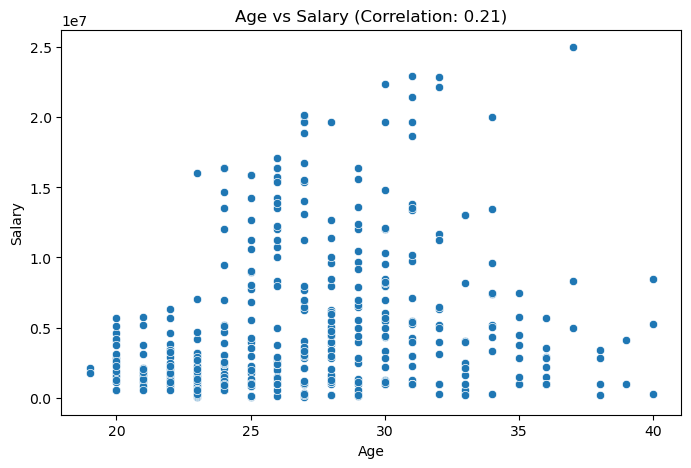

In [42]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Age', y='Salary')
plt.title('Age vs Salary (Correlation: 0.21)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

correlation is 0.21 which is a weak positive correlation.The age has only a minor influence on salary.
